In [30]:
import numpy as np
import pandas as pd
#import required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sn

# EDA

In [31]:
df = pd.read_csv('data/train.csv')
ds_test=pd.read_csv('data/test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [33]:
print(df.index)

RangeIndex(start=0, stop=2000, step=1)


In [34]:
df.shape#This dataset contais 21 columns and 2000  rows

(2000, 21)

In [35]:
# print the list of columns in the dataset to find the name of the prediction target
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [36]:
#Displaying descriptive statistics of DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [37]:
# Calculating the Missing Values
df.isnull().sum() 
# In this dataset there is no Null value

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Figure size 800x400 with 0 Axes>

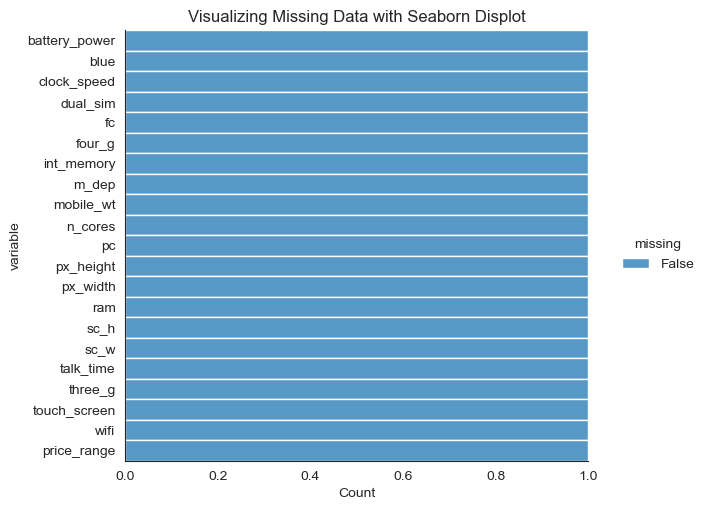

In [38]:
plt.figure(figsize=(8,4))
sn.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('Visualizing Missing Data with Seaborn Displot', size = 12)
plt.savefig("missing data.jpg", dpi=300)
plt.show()

In [39]:
# Column is categorical
# The classes are perfectly balanced.
print(df['price_range'].value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


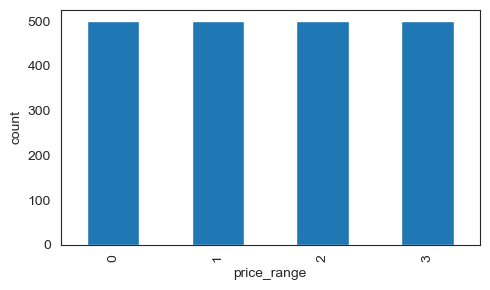

In [40]:
plt.figure(figsize=(5,3))
pd.value = df.groupby(['price_range'])['price_range'].count().plot(kind='bar')
plt.ylabel('count')
plt.xlabel('price_range')
plt.tight_layout()
plt.savefig("price_range.jpg", dpi=300)
plt.show()


In [41]:
X = df.drop(columns = ['price_range'])
y = df[['price_range']]
y.value_counts()/len(df)

price_range
0              0.25
1              0.25
2              0.25
3              0.25
dtype: float64

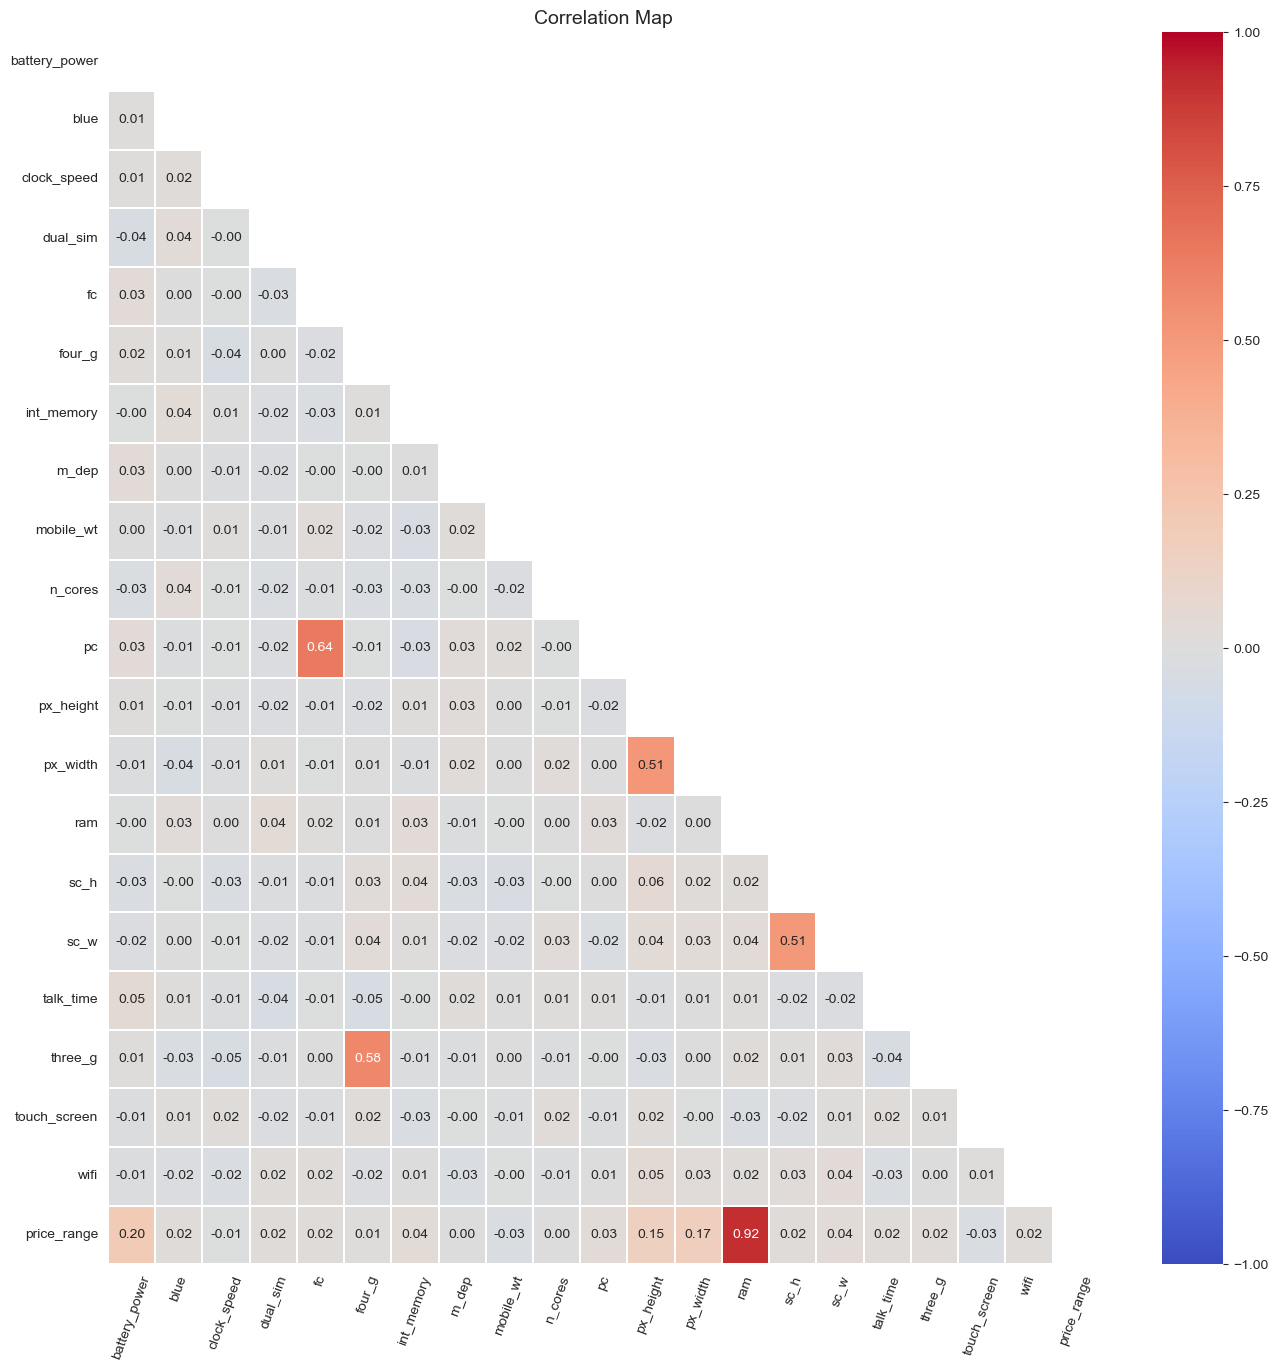

In [45]:
matrix = np.triu(df.corr())
sn.set_style("white")
f,ax=plt.subplots(figsize = (16,16))
sn.heatmap(df.corr(),annot= True,fmt = ".2f",ax=ax,
            vmin = -1,
            vmax = 1, mask = matrix,cmap = "coolwarm",
            linewidth = 0.2,linecolor = "white")

plt.xticks(rotation=70)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.savefig("corr.jpg", dpi=300)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_other, X_test, y_other, y_test = train_test_split(df, y, test_size=0.6, random_state=0)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=0)

print(X_train.shape)
print(X_CV.shape)
print(X_test.shape)

(600, 21)
(200, 21)
(1200, 21)


# Data processing 

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [48]:
X = df.drop(columns = ['price_range'])
y = df[['price_range']]
# collect the various features
ordinal_ftrs = ['fc','n_cores','pc','sc_h','sc_w','talk_time']
ordinal_cats = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],\
                ['1','2','3','4','5','6','7','8'],\
                ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],\
                ['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],\
                ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18'],\
                ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],\
                ]

num_ftrs = ['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram']
cat_ftrs = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']


preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), cat_ftrs),
        ('std', StandardScaler(), num_ftrs)])


In [49]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

(600, 26)
(200, 26)
(1200, 26)


In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  make_scorer, accuracy_score, fbeta_score
from sklearn.model_selection import StratifiedKFold, KFold,GridSearchCV
import warnings
warnings.filterwarnings("ignore")



In [59]:
def MLpipe_KFold_Accu(X, y, preprocessor, ML_algo, param_grid): 
    ''' This function splits the data to other/test (60/40) 
        and then applies KFold with 5 folds to other. 
        The RMSE is minimized in cross-validation. '''
        
    random_state = 5
    test_scores = np.zeros(random_state)
    best_models = []
    for i in range(random_state):
        print('randoms state '+str(i+1))
    
        X_other,X_test,y_other,y_test = train_test_split(X, y, stratify=y, train_size = 0.6, random_state = 42*i)
       
        kf = KFold(n_splits=5, shuffle = True, random_state= 42*i)
        pipe = Pipeline(steps = [('preprocessor', preprocessor),
                                    ('Classifier', ML_algo)])
        
        grid = GridSearchCV(pipe, param_grid = param_grid, 
                            scoring = make_scorer(accuracy_score),
                            cv=kf, return_train_score = True,n_jobs=-1,verbose=True)
        grid.fit(X_other,y_other.values.ravel())
        
        print('best model parameters:', grid.best_params_)
        print('corresponding validation score:',grid.best_score_)
        
        best_estimator = grid.best_estimator_
        best_params = grid.best_params_
        best_models.append(best_estimator)
        
        y_test_pred = best_models[-1].predict(X_test)
        test_scores[i] = accuracy_score(y_test,y_test_pred) 
        print('test score:',test_scores[i])
        
        
        
        feature_names = grid.best_estimator_[0].get_feature_names_out()

        
    return best_models, test_scores,grid, X_test, y_test,feature_names

In [60]:
#linear classification with l2 regularization 
from  sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier
param_grid = {'Classifier__alpha': [ -1, 1, 10, 50, 100]}
            

ML_algo = RidgeClassifier()
best_models_Ridge, scores_Ridge,grid_Ridge, X_test_Ridge, y_test_Ridge,feature_names_Ridge = MLpipe_KFold_Accu(X, y, preprocessor, ML_algo, param_grid)

randoms state 1
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__alpha': 1}
corresponding validation score: 0.6233333333333333
test score: 0.6125
randoms state 2
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__alpha': 10}
corresponding validation score: 0.6158333333333335
test score: 0.59875
randoms state 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__alpha': 10}
corresponding validation score: 0.615
test score: 0.595
randoms state 4
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__alpha': 10}
corresponding validation score: 0.6125
test score: 0.6
randoms state 5
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__alpha': 10}
corresponding validation score: 0.6141666666666665
test score: 0.6


In [61]:
print("Ridge: mean:", np.mean(scores_Ridge), ", std:", np.std(scores_Ridge))
mean_Ridge = np.mean(scores_Ridge)
std_Ridge = np.std(scores_Ridge)

Ridge: mean: 0.6012500000000001 , std: 0.00591607978309964


In [143]:

file = open('ridge.save','wb')
pickle.dump((best_models_Ridge, scores_Ridge,grid_Ridge, X_test_Ridge, y_test_Ridge,feature_names_Ridge),file)
file.close()

In [65]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
param_grid = {
              'Classifier__max_depth': [10,30,50,70,100],
              'Classifier__max_features': np.arange(0.1, 1, 10)
              }



ML_algo = RandomForestClassifier()
best_models_RF, scores_RF,grid_RF, X_test_RF, y_test_RF,feature_names_RF = MLpipe_KFold_Accu(X, y, preprocessor, ML_algo, param_grid)




randoms state 1
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__max_depth': 10, 'Classifier__max_features': 0.1}
corresponding validation score: 0.74
test score: 0.74
randoms state 2
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__max_depth': 50, 'Classifier__max_features': 0.1}
corresponding validation score: 0.7558333333333334
test score: 0.79125
randoms state 3
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__max_depth': 70, 'Classifier__max_features': 0.1}
corresponding validation score: 0.7683333333333334
test score: 0.7075
randoms state 4
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model parameters: {'Classifier__max_depth': 100, 'Classifier__max_features': 0.1}
corresponding validation score: 0.7483333333333333
test score: 0.745
randoms state 5
Fitting 5 folds for each of 5 candidates, totalling 25 fits
best model 

In [66]:
print("RF: mean:", np.mean(scores_RF), ", std:", np.std(scores_RF))
mean_RF = np.mean(scores_RF)
std_RF = np.std(scores_RF)

RF: mean: 0.74925 , std: 0.02751817581163402


In [144]:
file = open('RF.save','wb')
pickle.dump((best_models_RF, scores_RF,grid_RF, X_test_RF, y_test_RF,feature_names_RF),file)
file.close()

In [70]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'Classifier__n_neighbors': np.arange(1,5,1),
              'Classifier__weights': ["uniform", "distance"]}

ML_algo = KNeighborsClassifier()
best_models_KNN, scores_KNN, grid_KNN, X_test_KNN, y_test_KNN,feature_names_KNN = MLpipe_KFold_Accu(X, y, preprocessor, ML_algo, param_grid)


randoms state 1
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

best model parameters: {'Classifier__n_neighbors': 4, 'Classifier__weights': 'distance'}
corresponding validation score: 0.3433333333333333
test score: 0.3225
randoms state 2
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

best model parameters: {'Classifier__n_neighbors': 3, 'Classifier__weights': 'distance'}
corresponding validation score: 0.3375
test score: 0.33875
randoms state 3
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


best model parameters: {'Classifier__n_neighbors': 4, 'Classifier__weights': 'distance'}
corresponding validation score: 0.33083333333333337
test score: 0.35625
randoms state 4
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

best model parameters: {'Classifier__n_neighbors': 4, 'Classifier__weights': 'distance'}
corresponding validation score: 0.33333333333333337
test score: 0.34125
randoms state 5
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

best model parameters: {'Classifier__n_neighbors': 4, 'Classifier__weights': 'distance'}
corresponding validation score: 0.335
test score: 0.335


In [71]:
print("KNN: mean:", np.mean(scores_KNN), ", std:", np.std(scores_KNN))
mean_KNN = np.mean(scores_KNN)
std_KNN = np.std(scores_KNN)

KNN: mean: 0.33875 , std: 0.010868532559642078


In [145]:
file = open('KNN.save','wb')
pickle.dump((best_models_KNN, scores_KNN, grid_KNN, X_test_KNN, y_test_KNN,feature_names_KNN),file)
file.close()

In [72]:
import pandas as pd 
from pandas import MultiIndex, Int64Index
import xgboost
from sklearn.model_selection import ParameterGrid
from xgboost import XGBClassifier
import warnings;warnings.filterwarnings("ignore")

param_grid = {"Classifier__learning_rate": [0.3],
               "Classifier__n_estimators": [10000],
                  "Classifier__seed": [0],
                  "Classifier__max_depth": [1,3],
                  "Classifier__colsample_bytree": [0.4,0.9],  
                  "Classifier__subsample": [0.66],
                 
                 "Classifier__eval_metric": ['mlogloss'],
                }
    
ML_algo = XGBClassifier(use_label_encoder =False)

best_models_XGB, scores_XGB,grid_XGB, X_test_XGB, y_test_XGB,feature_names_XGB = MLpipe_KFold_Accu(X, y, preprocessor, ML_algo, param_grid)



randoms state 1
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/envs/1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use p

best model parameters: {'Classifier__colsample_bytree': 0.9, 'Classifier__eval_metric': 'mlogloss', 'Classifier__learning_rate': 0.3, 'Classifier__max_depth': 3, 'Classifier__n_estimators': 10000, 'Classifier__seed': 0, 'Classifier__subsample': 0.66}
corresponding validation score: 0.8858333333333335
test score: 0.89125
randoms state 2
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'Classifier__colsample_bytree': 0.9, 'Classifier__eval_metric': 'mlogloss', 'Classifier__learning_rate': 0.3, 'Classifier__max_depth': 3, 'Classifier__n_estimators': 10000, 'Classifier__seed': 0, 'Classifier__subsample': 0.66}
corresponding validation score: 0.8708333333333333
test score: 0.915
randoms state 3
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best model parameters: {'Classifier__colsample_bytree': 0.9, 'Classifier__eval_metric': 'mlogloss', 'Classifier__learning_rate': 0.3, 'Classifier__max_depth': 3, 'Classifier__n_estimators': 10000, 'Classifi

In [73]:
print("XGB: mean:", np.mean(scores_XGB), ", std:", np.std(scores_XGB))
mean_XGB = np.mean(scores_XGB)
std_XGB = np.std(scores_XGB)

XGB: mean: 0.89875 , std: 0.009585144756340416


In [146]:
file = open('XGB.save','wb')
pickle.dump((best_models_XGB, scores_XGB,grid_XGB, X_test_XGB, y_test_XGB,feature_names_XGB),file)
file.close()

In [74]:
ftr_names = X.columns
np.random.seed(42)

nr_runs = len(ftr_names)
scores = np.zeros([len(ftr_names),nr_runs])



for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
   

    for j in range(nr_runs):
        X_test_shuffled = X_test_XGB.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test_XGB[ftr_names[i]].values)
        acc_scores.append(grid_XGB.score(X_test_shuffled,y_test_XGB))
        
        
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

shuffling battery_power
   shuffled test score: 0.747 +/- 0.009
shuffling blue
   shuffled test score: 0.906 +/- 0.002
shuffling clock_speed
   shuffled test score: 0.903 +/- 0.003
shuffling dual_sim
   shuffled test score: 0.905 +/- 0.002
shuffling fc
   shuffled test score: 0.905 +/- 0.002
shuffling four_g
   shuffled test score: 0.901 +/- 0.002
shuffling int_memory
   shuffled test score: 0.903 +/- 0.004
shuffling m_dep
   shuffled test score: 0.902 +/- 0.003
shuffling mobile_wt
   shuffled test score: 0.895 +/- 0.003
shuffling n_cores
   shuffled test score: 0.902 +/- 0.003
shuffling pc
   shuffled test score: 0.898 +/- 0.003
shuffling px_height
   shuffled test score: 0.833 +/- 0.008
shuffling px_width
   shuffled test score: 0.832 +/- 0.007
shuffling ram
   shuffled test score: 0.273 +/- 0.018
shuffling sc_h
   shuffled test score: 0.9 +/- 0.004
shuffling sc_w
   shuffled test score: 0.901 +/- 0.005
shuffling talk_time
   shuffled test score: 0.901 +/- 0.002
shuffling three_g
   

In [75]:
Models = ['Ridge','RandomForest', 'KNN','XGBoost']
x_pos = np.arange(len(Models))
means = [mean_Ridge, mean_RF, mean_KNN, mean_XGB]
error = [std_Ridge, std_RF, std_KNN, std_XGB]


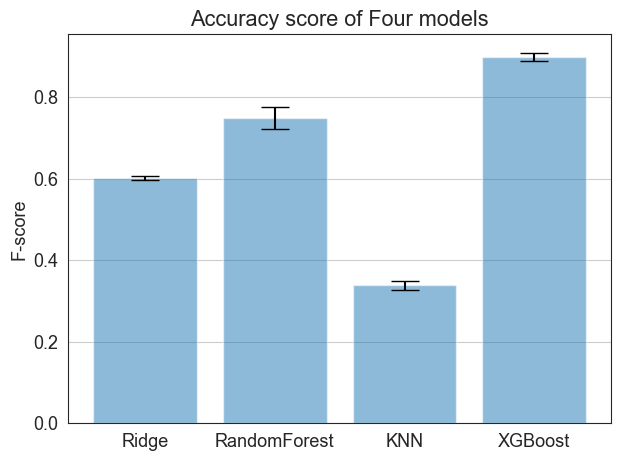

In [139]:
fig, ax = plt.subplots()
ax.bar(x_pos,means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('F-score')
ax.set_xticks(x_pos)
ax.set_xticklabels(Models)
ax.set_title('Accuracy score of Four models')
ax.yaxis.grid(True)


plt.tight_layout()
plt.savefig("Accuracy.jpg", dpi=300)
plt.show()

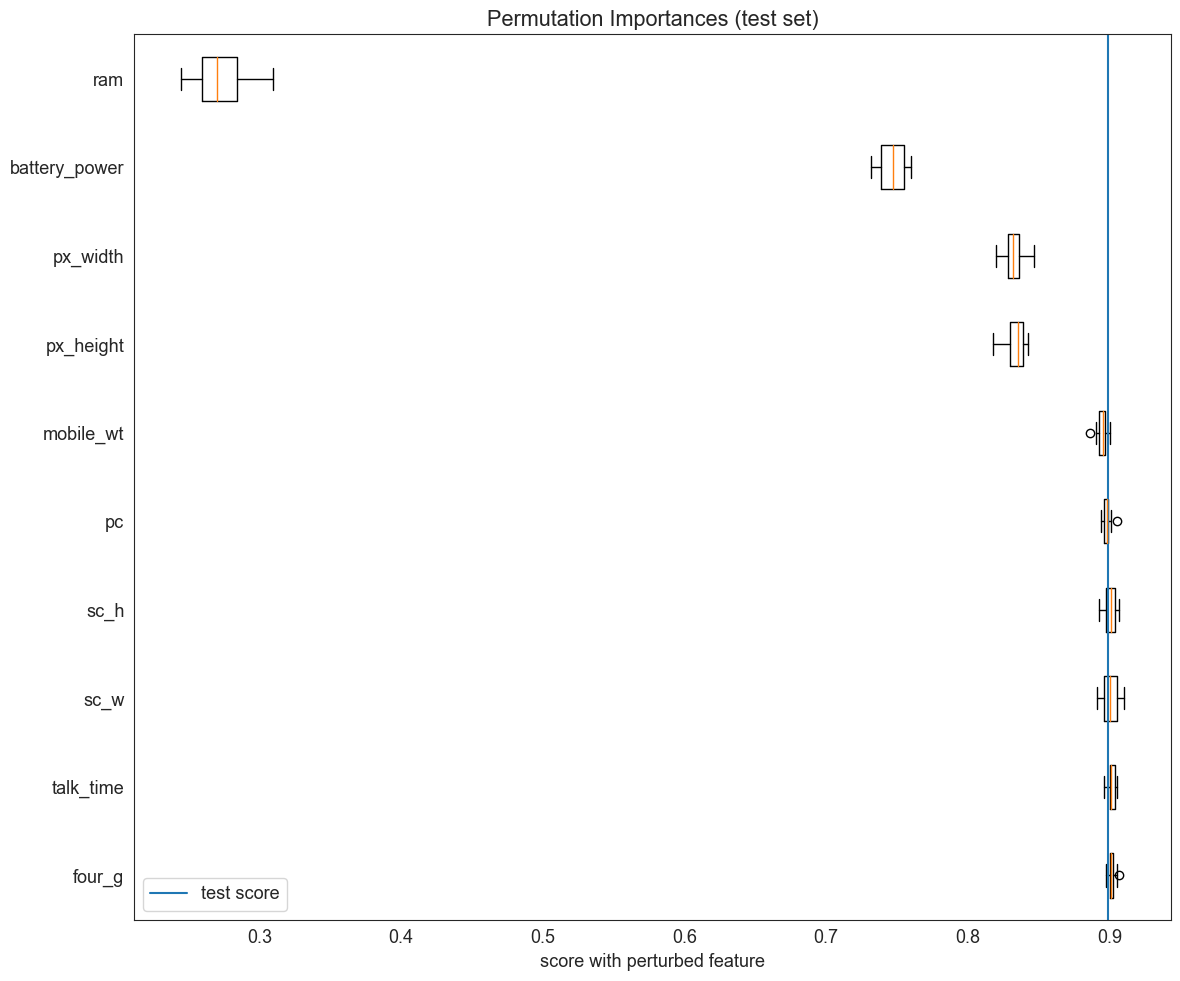

In [77]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(12,10))
plt.boxplot(scores[sorted_indcs[-10:]].T ,labels=ftr_names[sorted_indcs[-10:]],vert=False)
plt.axvline(mean_XGB,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig("permutation importance.jpg", dpi=300)
plt.show()

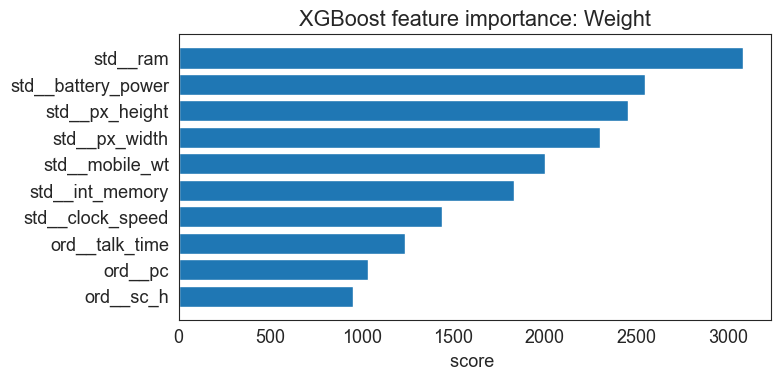

In [135]:


score = grid_XGB.best_estimator_.named_steps["Classifier"].get_booster().get_score(importance_type = 'weight').items()
score = list(score)
a = [[0]*2 for i in range(len(score))]
for i in range(len(score)):
    a[i][0] = feature_names_RF[i]
    a[i][1] = score[i][1]
    
score = dict(sorted(a, key=lambda item: item[1]))

feature_names_sorted = list(score.keys())[-10:]
sum_list = list(score.values())[-10:]
plt.figure(figsize=(8,4))
plt.barh(feature_names_sorted,sum_list)
plt.xlabel('score ')
plt.title('XGBoost feature importance: Weight')
plt.savefig("XGBoost feature importance: Weight", dpi=300,bbox_inches='tight')


plt.tight_layout()

plt.show()


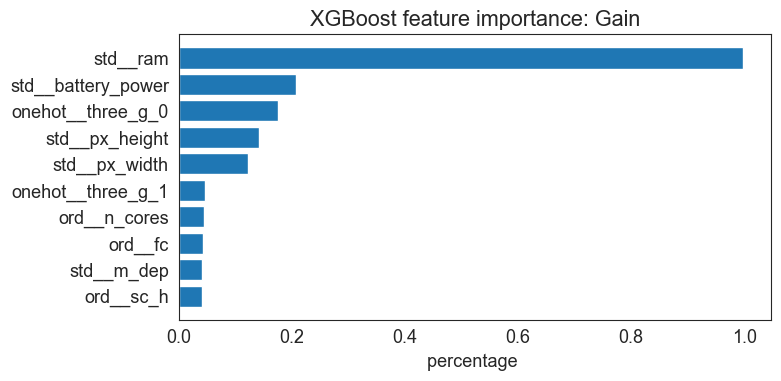

In [134]:
score = grid_XGB.best_estimator_.named_steps["Classifier"].get_booster().get_score(importance_type = 'gain').items()
score = list(score)
a = [[0]*2 for i in range(len(score))]
for i in range(len(score)):
    a[i][0] = feature_names_RF[i]
    a[i][1] = score[i][1]
    
score = dict(sorted(a, key=lambda item: item[1]))

feature_names_sorted = list(score.keys())[-10:]
sum_list = list(score.values())[-10:]
plt.figure(figsize=(8,4))
plt.barh(feature_names_sorted, sum_list)
plt.title('XGBoost feature importance: Gain')
plt.xlabel('percentage ')
plt.savefig("XGBoost feature importance: Gain", dpi=300,bbox_inches='tight')

plt.tight_layout()

plt.show()

In [80]:
import shap
shap.initjs() 
explainer = shap.TreeExplainer(grid_XGB.best_estimator_[1])

X_test_transformed = grid_XGB.best_estimator_[0].transform(X_test_XGB)
print(np.shape(X_test_transformed))

shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(800, 26)
(4, 800, 26)


1.247936


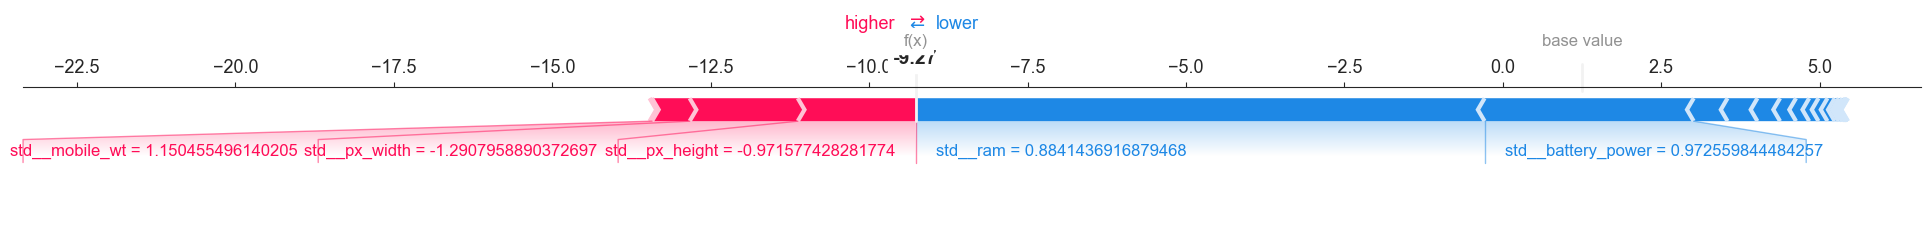

In [138]:
index = 1 # the index of the point to explain

shap.initjs() 
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names,matplotlib= True,show=False)

plt.tight_layout()
plt.savefig('SHAP local feature importance_1.png' , dpi=300)
plt.show()



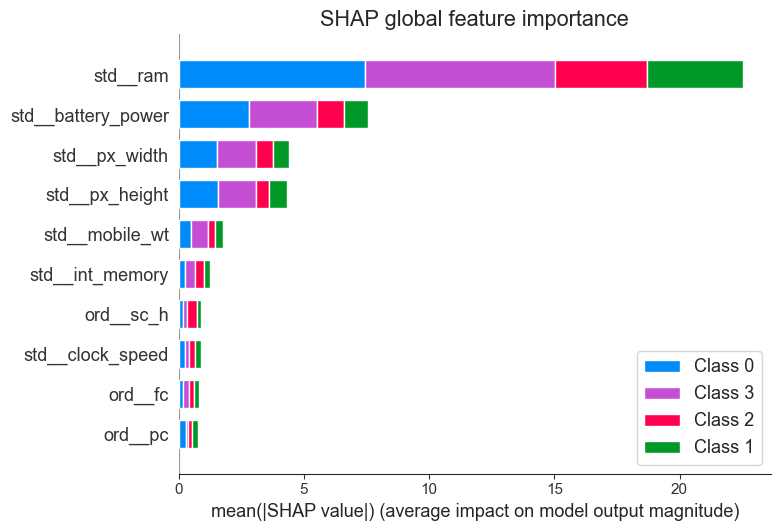

In [113]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names_RF, max_display=10,show=False)

plt.title('SHAP global feature importance')
plt.legend()
plt.tight_layout()
plt.savefig('SHAP global feature importance' , dpi=300)
plt.show()

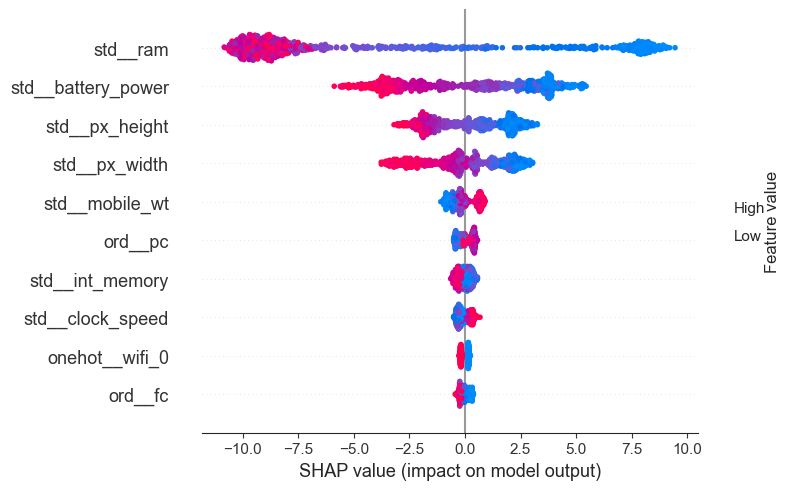

In [85]:

shap.summary_plot(shap_values[0], X_test_transformed, feature_names_RF, max_display=10,show=False)
plt.savefig("SHAP class0", dpi=300)
plt.show()


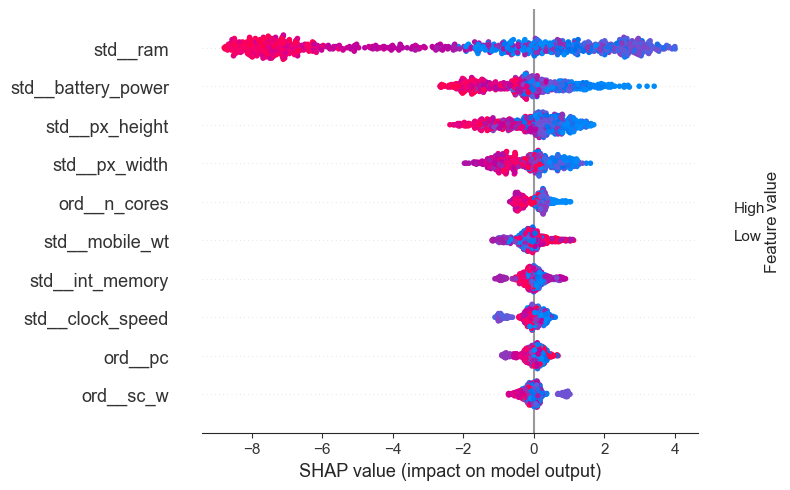

In [86]:
shap.summary_plot(shap_values[1], X_test_transformed, feature_names_RF, max_display=10,show=False)
plt.savefig("SHAP class1", dpi=300)
plt.show()


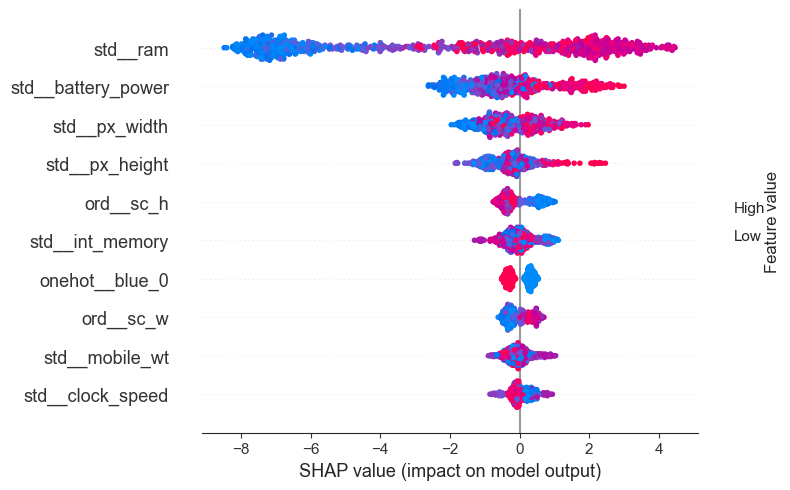

In [87]:
shap.summary_plot(shap_values[2], X_test_transformed, feature_names_RF, max_display=10,show=False)
plt.savefig("SHAP class2", dpi=300)
plt.show()


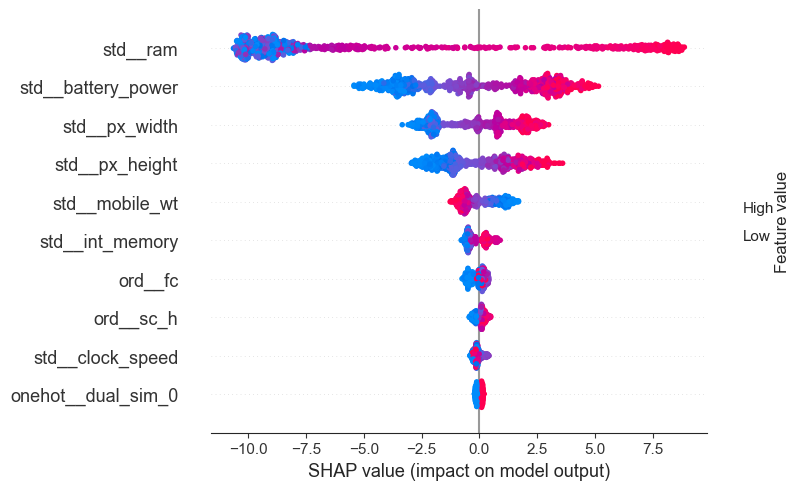

In [88]:
shap.summary_plot(shap_values[3], X_test_transformed, feature_names_RF, max_display=10,show=False)
plt.savefig("SHAP class3", dpi=300)
plt.show()
